Problema: Detecção de anomalias em dados de vibração de motores.

Solução:
A detecção de anomalias em dados de vibração de motores é importante para identificar falhas ou comportamentos incomuns que possam indicar problemas no motor. Vamos utilizar uma abordagem combinada de Isolation Forest e Autoencoder para detectar anomalias nos dados de vibração.

Passos:

Coleta de dados: Primeiro, coletamos dados de vibração do motor ao longo do tempo. Neste exemplo, usaremos dados de vibração simulados.

Pré-processamento: Normalizamos os dados de vibração para que todas as características tenham média zero e variância unitária. Isso é importante para garantir que todas as características tenham a mesma escala.

Construção do modelo Autoencoder: Criamos um modelo de autoencoder, que é uma rede neural que mapeia os dados de entrada em uma representação latente e, em seguida, reconstrói os dados de entrada a partir dessa representação latente. O autoencoder é treinado para minimizar a perda de reconstrução, ou seja, para reconstruir os dados de entrada o mais precisamente possível.

Detecção de anomalias com Autoencoder: Usamos o modelo treinado do autoencoder para reconstruir os dados de entrada e calculamos o erro de reconstrução, que é a diferença entre os dados de entrada e os dados reconstruídos. Quanto maior o erro de reconstrução, mais provável é que os dados sejam uma anomalia.

Construção do modelo Isolation Forest: Criamos um modelo de Isolation Forest, que é um algoritmo de aprendizado não supervisionado baseado em árvores de decisão. O modelo é treinado para isolar as anomalias, atribuindo pontuações de anomalia às amostras. Quanto menor a pontuação, mais provável é que a amostra seja uma anomalia.

Detecção de anomalias com Isolation Forest: Usamos o modelo treinado do Isolation Forest para atribuir pontuações de anomalia aos erros de reconstrução calculados anteriormente. Amostras com pontuações de anomalia mais baixas são consideradas mais prováveis de serem anomalias.

Visualização dos resultados: Plotamos os dados de vibração ao longo do tempo para cada sensor, destacando as anomalias detectadas pelo Isolation Forest em vermelho e pelo Autoencoder em azul.

Avaliação e ajuste: Avaliamos os resultados e, se necessário, podemos ajustar os parâmetros dos modelos, como a taxa de contaminação para o Isolation Forest ou a arquitetura do autoencoder, para melhorar a detecção de anomalias.

Essa solução combina as vantagens do Isolation Forest, que é um algoritmo eficaz para detecção de anomalias em conjuntos de dados de alta dimensão, com as capacidades do Autoencoder, que pode capturar padrões complexos nos dados de vibração e detectar anomalias sutis.

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

4/4 [==============================] - 0s 2ms/step


<Figure size 640x480 with 0 Axes>

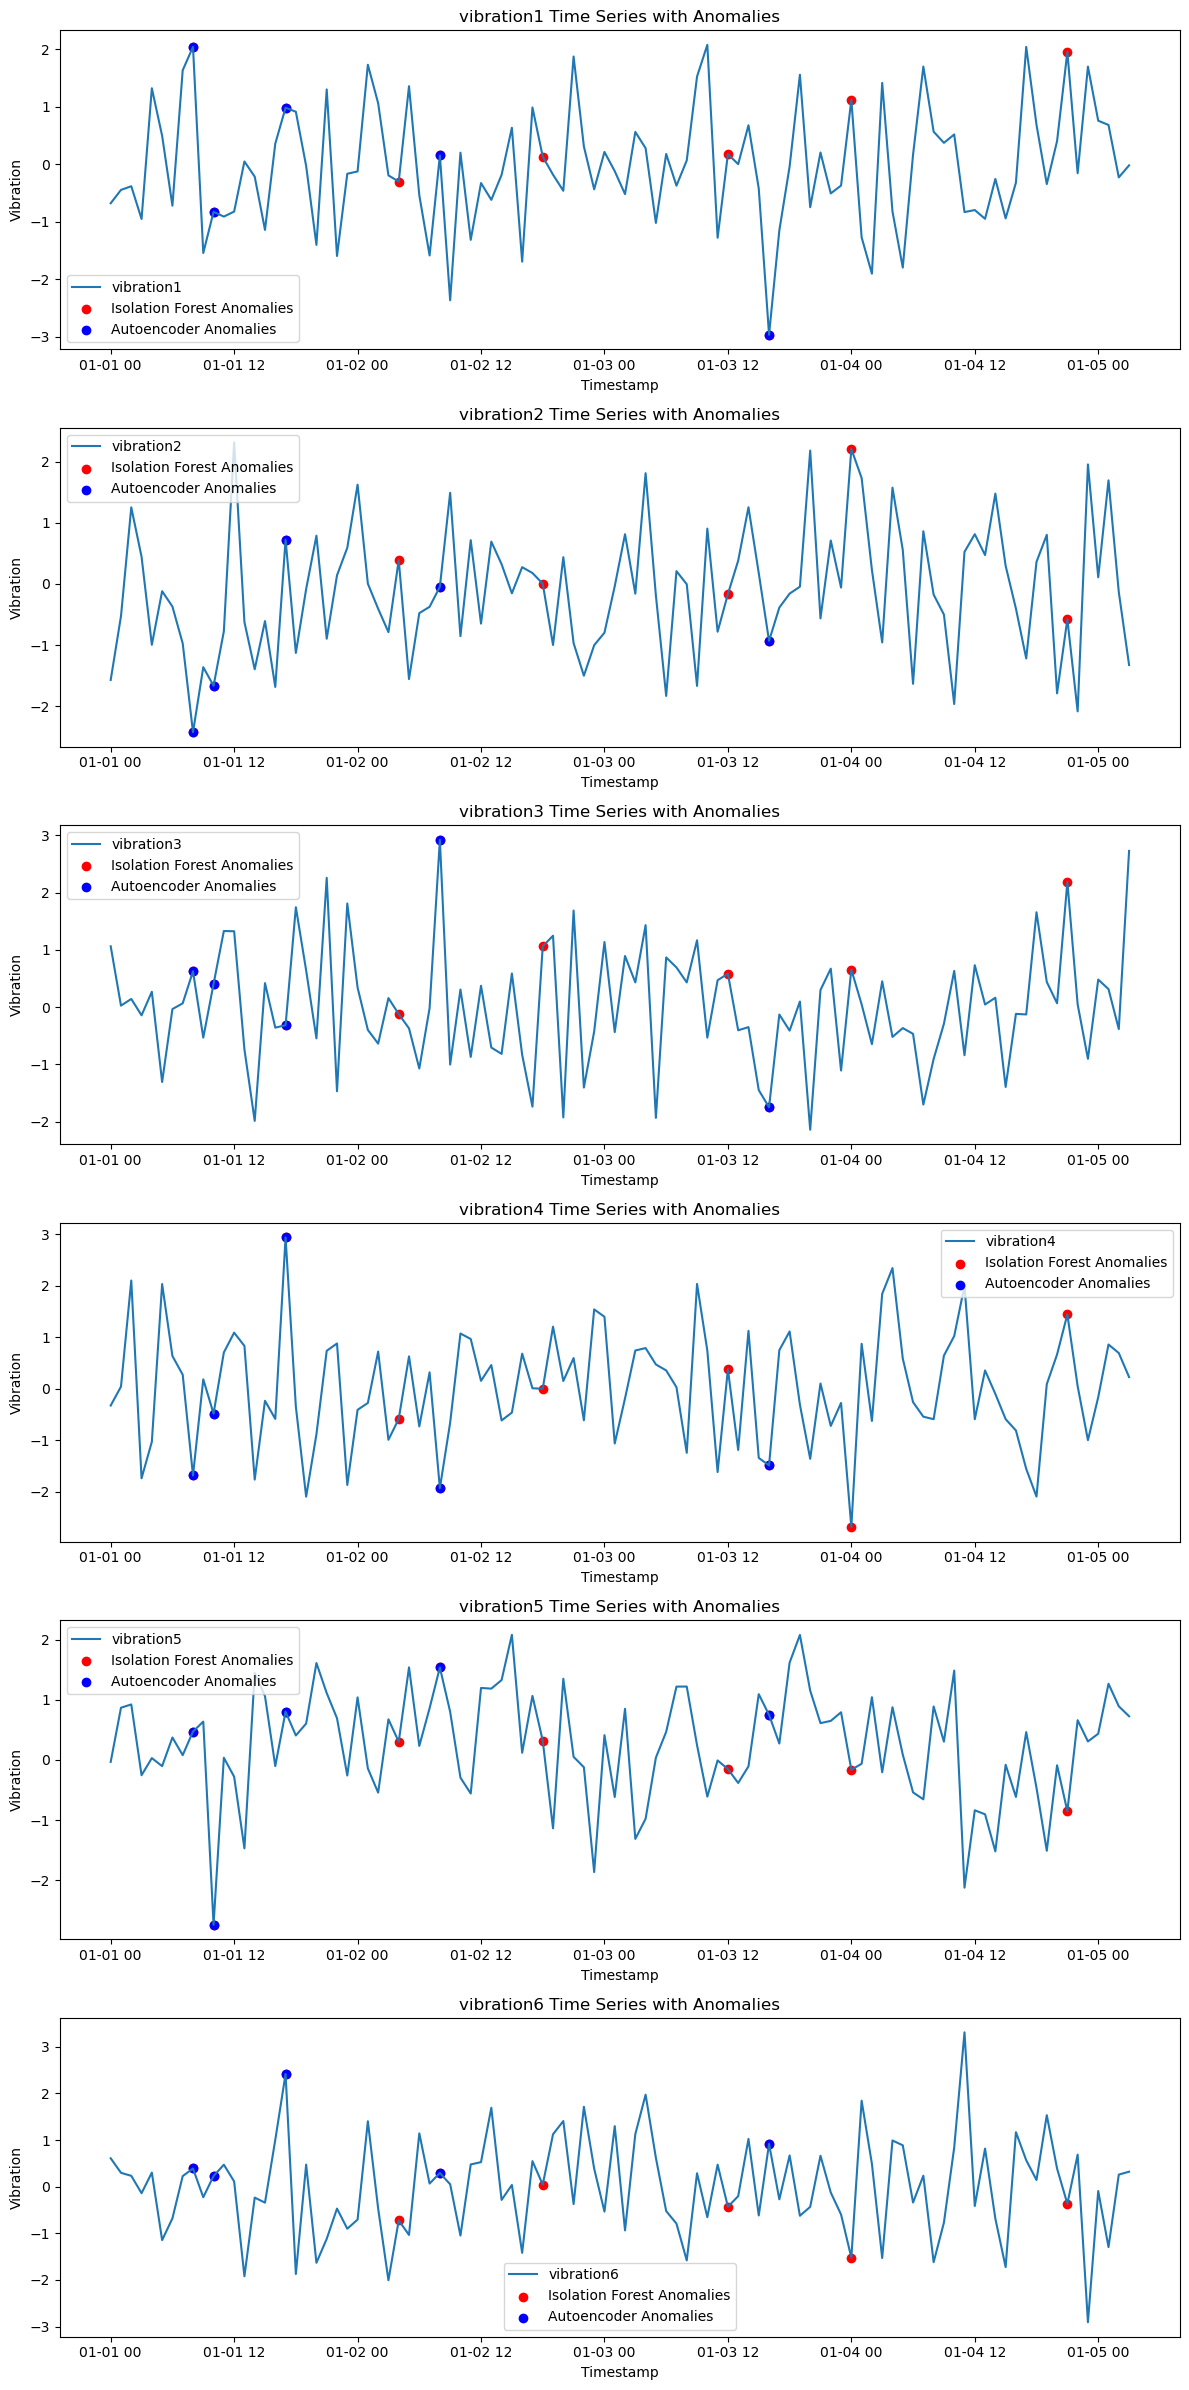

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create dummy input data for motor vibration
data = pd.DataFrame({
    'timestamp': pd.date_range(start='1/1/2023', periods=100, freq='H'),
    'vibration1': np.random.normal(0, 1, 100),
    'vibration2': np.random.normal(0, 1, 100),
    'vibration3': np.random.normal(0, 1, 100),
    'vibration4': np.random.normal(0, 1, 100),
    'vibration5': np.random.normal(0, 1, 100),
    'vibration6': np.random.normal(0, 1, 100)
})

# Create a feature vector
features = data.drop("timestamp", axis=1)

# Normalize the features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Create an autoencoder model
input_dim = normalized_features.shape[1]
encoding_dim = 3  # Choose the size of the encoding layer
autoencoder = Sequential([
    Dense(10, activation='relu', input_shape=(input_dim,)),
    Dense(encoding_dim, activation='relu'),
    Dense(10, activation='relu'),
    Dense(input_dim, activation='linear')
])

# Compile and fit the autoencoder model
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(normalized_features, normalized_features, epochs=50, batch_size=16, verbose=0)

# Use the autoencoder for anomaly detection
reconstructed_features = autoencoder.predict(normalized_features)
reconstruction_errors = np.mean(np.square(normalized_features - reconstructed_features), axis=1)

# Create an IsolationForest model
isolation_forest = IsolationForest(n_estimators=100, contamination=0.1)

# Fit the model to the reconstruction errors
isolation_forest.fit(reconstruction_errors.reshape(-1, 1))

# Predict anomalies using Isolation Forest
isolation_forest_anomalies = isolation_forest.predict(reconstruction_errors.reshape(-1, 1))

# Predict anomalies using Autoencoder
autoencoder_anomalies = np.where(reconstruction_errors > np.percentile(reconstruction_errors, 95), -1, 1)

# Plot time series data and anomalies for each vibration sensor
fig, axes = plt.subplots(6, 1, figsize=(12, 24))
sensors = ['vibration1', 'vibration2', 'vibration3', 'vibration4', 'vibration5', 'vibration6']

for i, sensor in enumerate(sensors):
    ax = axes[i]
    ax.plot(data['timestamp'], data[sensor], label=sensor)

    # Highlight Isolation Forest anomalies in red
    isolation_forest_anomaly_indices = np.where(isolation_forest_anomalies == -1)[0]
    isolation_forest_anomaly_timestamps = data['timestamp'].iloc[isolation_forest_anomaly_indices]
    isolation_forest_anomaly_values = data[sensor].iloc[isolation_forest_anomaly_indices]

    ax.scatter(isolation_forest_anomaly_timestamps, isolation_forest_anomaly_values, color='red',
               label='Isolation Forest Anomalies')

    # Highlight Autoencoder anomalies in blue
    autoencoder_anomaly_indices = np.where(autoencoder_anomalies == -1)[0]
    autoencoder_anomaly_timestamps = data['timestamp'].iloc[autoencoder_anomaly_indices]
    autoencoder_anomaly_values = data[sensor].iloc[autoencoder_anomaly_indices]

    ax.scatter(autoencoder_anomaly_timestamps, autoencoder_anomaly_values, color='blue',
               label='Autoencoder Anomalies')

    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Vibration')
    ax.set_title(f'{sensor} Time Series with Anomalies')
    ax.legend()

plt.tight_layout()

# Save images as JPG
for i, sensor in enumerate(sensors):
    plt.figure(i)
    plt.savefig(f'{sensor}_anomalies.jpg', bbox_inches='tight')

plt.show()


In [2]:
import json

# Criar dicionário para armazenar as anomalias
anomalies_dict = {}

# Converter os objetos Timestamp para strings
isolation_forest_anomaly_timestamps = isolation_forest_anomaly_timestamps.astype(str)
autoencoder_anomaly_timestamps = autoencoder_anomaly_timestamps.astype(str)

# Adicionar as anomalias detectadas pelo Isolation Forest ao dicionário
anomalies_dict['Isolation Forest'] = {
    'timestamps': isolation_forest_anomaly_timestamps.to_list(),
    'values': isolation_forest_anomaly_values.to_list()
}

# Adicionar as anomalias detectadas pelo Autoencoder ao dicionário
anomalies_dict['Autoencoder'] = {
    'timestamps': autoencoder_anomaly_timestamps.to_list(),
    'values': autoencoder_anomaly_values.to_list()
}

# Salvar o dicionário como um arquivo JSON
with open('anomalies.json', 'w') as f:
    json.dump(anomalies_dict, f, indent=4, default=str)
